# Regression Analysis - HSG Project Python

## About

This is a regression model using a downloaded dataset from kaggle (https://www.kaggle.com/spscientist/students-performance-in-exams) related to students performance in exams. First, we created simple scatter plots comparing two pieces of data at a time. Second, we performaned a simple linear regression analysis with a training and a test set. Third, we performed a multiple regression using selected data. The reason for only using selected data is, that using more or different data tended to decrease model quality. Last, we created a prediction tool based on a different multiple linear regression.

### Importing needed packages

Not all packages are imported right away but will be added once they are needed

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
get_ipython().magic(u'matplotlib inline')

### Importing Data

StudentsPerformance.csv is imported and displayed.

In [2]:
#import dataset and read data
df = pd.read_csv(r"C:\Users\yizhe\Anaconda3\Library\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Basic Data Exploration

In [3]:
# summarize the data; see statistical details of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
# Check number of rows and columns
df.shape 

(1000, 8)

In [5]:
# check the column names
df.columns 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
#changing spaces in column heading to underscore
df.columns = ["gender","race/ethnicity","parental_level_of_education","lunch","test_preparation_course","math_score","reading_score","writing_score"]

In [7]:
# New dataframe contains selected columns from old dataframe
cdf=df[['gender','test_preparation_course','math_score','reading_score','writing_score']]
cdf.head()

,gender,test_preparation_course,math_score,reading_score,writing_score
0,female,none,72,72,74
1,female,completed,69,90,88
2,female,none,90,95,93
3,male,none,47,57,44
4,male,none,76,78,75


In [8]:
# creatre data frame VIZ with selected columns from existing cdf dataframe
viz= cdf[['gender','test_preparation_course','math_score','reading_score','writing_score']]
viz.hist

<bound method hist_frame of      gender test_preparation_course  math_score  reading_score  writing_score
0    female                    none          72             72             74
1    female               completed          69             90             88
2    female                    none          90             95             93
3      male                    none          47             57             44
4      male                    none          76             78             75
5    female                    none          71             83             78
6    female               completed          88             95             92
7      male                    none          40             43             39
8      male               completed          64             64             67
9    female                    none          38             60             50
10     male                    none          58             54             52
11     male                    none 

In [9]:
plt.show()

### Scatter Plots

Scatter plots are created to show the relationship between selected data

#### Writing score in relation to math score

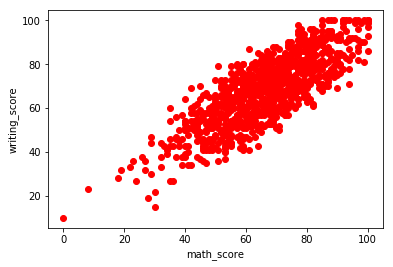

In [10]:
plt.scatter(cdf.math_score, cdf.writing_score,  color='red')
plt.xlabel("math_score")
plt.ylabel("writing_score")
plt.show()

#### Math score in relation to reading score

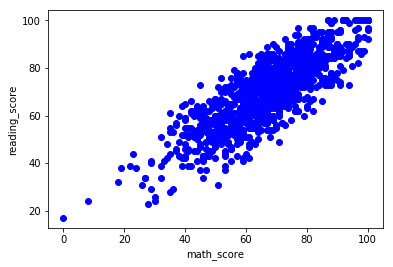

In [11]:
plt.scatter(cdf.math_score,cdf.reading_score, color ='blue')
plt.xlabel("math_score")
plt.ylabel("reading_score")
plt.show()

#### Reading score in relation to Writing score

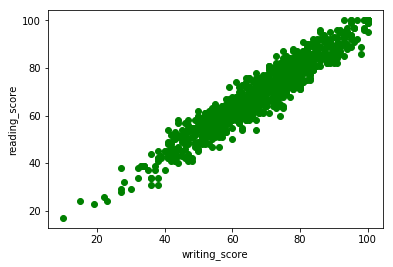

In [12]:
plt.scatter(cdf.writing_score,cdf.reading_score, color ='green')
plt.xlabel("writing_score")
plt.ylabel("reading_score")
plt.show()

#### Gender in relation to math score

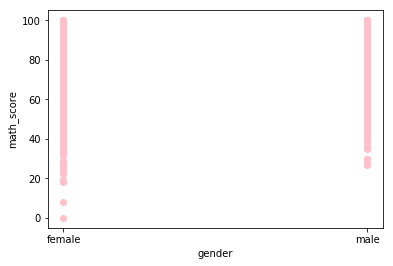

In [13]:
plt.scatter(cdf.gender,cdf.math_score, color ='pink')
plt.xlabel("gender")
plt.ylabel("math_score")
plt.show()

#### Math score in relation to test preparation

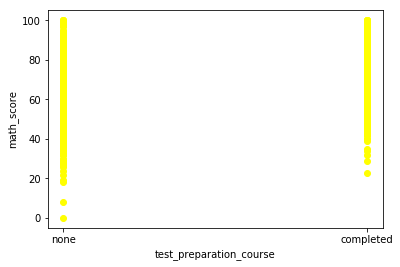

In [14]:
plt.scatter(cdf.test_preparation_course,cdf.math_score, color ='yellow')
plt.xlabel("test_preparation_course")
plt.ylabel("math_score")
plt.show()

## Simple Linear Regression Model

Splitting data into a train and test dataset, a simple linear regression model minimize the residual sum of squares between the independent x, in this case math score, in the dataset, and the dependent y, in this case writing score, by the linear approximation.

In [15]:
#create train and test dataset
msk = np.random.rand(len(df)) < 0.70
train = cdf[msk]
test = cdf[~msk]

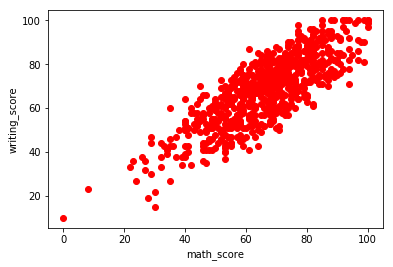

In [16]:
#Train data distribution
plt.scatter(train.math_score,train.writing_score, color = 'red')
plt.xlabel("math_score")
plt.ylabel("writing_score")
plt.show()

#### Modeling 

In [17]:
# Using sklearn package to model data

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['math_score']])
train_y = np.asanyarray(train[['writing_score']])
regr.fit(train_x,train_y)

# The coefficients
print ('Coefficients : ',regr.coef_)
print ('Intercept : ',regr.intercept_)

Coefficients :  [[0.82220031]]
Intercept :  [13.85001442]


#### Plot Outputs

Text(0, 0.5, 'writing_score')

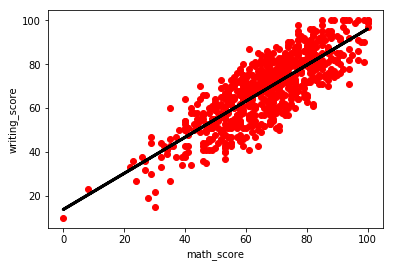

In [18]:
train_y_ = regr.predict(train_x)
plt.scatter(train.math_score,train.writing_score, color ='red')
plt.plot(train_x, train_y_, color='black', linewidth =3)
plt.xlabel("math_score")
plt.ylabel("writing_score")

### Evaluation

In [19]:
# Evaluate the model with the Test data

test_x = np.asanyarray(test[['math_score']])
test_y = np.asanyarray(test[['writing_score']])
test_y_ = regr.predict(test_x)

print ("Residual Sum of Squares : %.2f"
      % np.mean((test_y_ - test_y)**2))

# Explained variance score: 1 is perfect prediction

print('Variance Score : %.2f' % regr.score(test_x,test_y))

Residual Sum of Squares : 83.53
Variance Score : 0.61


#### Plot Outputs of evaluation

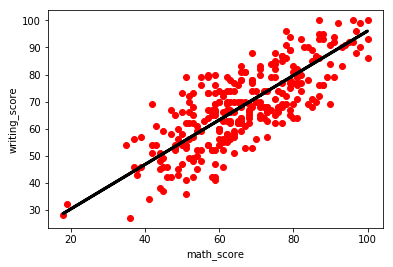

In [20]:
plt.scatter(test_x,test_y, color ='red')
plt.plot(test_x, test_y_, color ='black', linewidth =3)
plt.xlabel("math_score")
plt.ylabel("writing_score")
plt.show()

## Multiple Linear Regression Model

### Example of a multiple linear regression model

Using entire dataset to create the multiple regression model

In [21]:
# converting "none" and "completed" in test_preparation_course to 0 and 1 as dummy variables
# converting "female" and "male" in gender to 0 and 1 as dummy variables

df["test_preparation_completed"] = df.test_preparation_course.map({"none":0.0, "completed":1.0})
df["gender_male"] = df.gender.map({"female":0.0, "male":1.0})

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,test_preparation_completed,gender_male
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0


Using statsmodel and rating dummy variables as categorical variables, a multiple linear regression analysis is conducted.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
fit = ols ("math_score ~ C(test_preparation_completed) + reading_score + writing_score + C(gender_male)",data=df).fit()
fit.summary()

### Prediction Tool 

Based on a multiple linear regression, we created a tool thats allows prediction of the math score based variable inputs of the gender, writing score and reading score.

Note: a seperate window might open to display the tool.

In [ ]:
from pandas import DataFrame
import tkinter as tk 

X = df[["gender_male","writing_score","reading_score"]]
Y = df["math_score"]
model = sm.OLS(Y, X).fit ()

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# tkinter GUI
root= tk.Tk() 

canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)

# New_Gender label and input box
label1 = tk.Label(root, text='Type gender(0 for female, 1 for male): ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Writing_score label and input box
label2 = tk.Label(root, text=' Type writing score: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

# New_reading_score label and input box
label3 = tk.Label(root, text=' Type reading score: ')
canvas1.create_window(140, 140, window=label3)

entry3 = tk.Entry (root) # create 3nd entry box
canvas1.create_window(270, 140, window=entry3)


def values(): 
    global New_Gender #our 1st input variable
    New_Gender = float(entry1.get()) 
    
    global New_Writing_score #our 2nd input variable
    New_Writing_score = float(entry2.get()) 
    
    global New_Reading_score #our 3rd input variable
    New_Reading_score = float(entry3.get())
    
    Prediction_result  = ('Predicted math score: ', regr.predict([[New_Gender ,New_Reading_score, New_Writing_score]]))
    
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Math score',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 180, window=button1)
 

root.mainloop()

Intercept: 
 -6.189216190867739
Coefficients: 
 [13.13780796  0.58064332  0.3821176 ]


C:\Users\yizhe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
